# Lesson Overview

**In this introductory lesson, we'll get an overview of the following:**

* The importance of choosing the right hardware
* The product development flow and the design of edge AI systems
* Some basic terminology
* Introduction to deploying and testing models using Intel DevCloud

* Choosing best hardware
  * Developement system
  * Deployment system
* Product developement flow
* Choosing an AI model
* Basic terminology
  * CPUs
  * AI Accelerators
    * VPUs
    * FPGAs
* Intel Devcloud for edge

# 1.Changes in OpenVINO 2020.1
This course uses OpenVINO 2020.1. but you should be aware of some of the key differences between 2020.1 vs. the older 2019 R3.1 version.

Major changes in OpenVINO 2020.1:

* You do not need to specify any extensions to load models. OpenVINO will be able to automatically detect and use these extensions if they are available.
* The IEPlugin API has been deprecated. You can use the IECore API instead to load your model.

# 2. Why is Choosing the Right Hardware Important?

#### When developing and edge AI project, you will usually follow the 5 steps shown here:

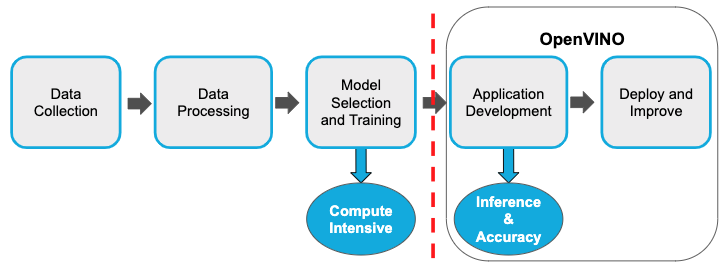

In [1]:
from IPython.display import Image
Image(filename='steps-in-deep-learning2.png')

### The process can be split into two parts.
* The first part involves collecting and using data to train a model (as shown on the left side of the red dotted line). Because this is very compute intensive, this is `done in advance on devices with high computational power, such as cloud servers.`

* The second part (shown on the right side of the red dotted line) `involves deploying the pre-trained model to the location where it is needed and running inference.` This stage is done on an edge device using OpenVINO. 

Since edge devices don't have to train the model, they don't need to have as much computational power. 
However, there are still a lot of factors to consider when selecting which hardware is most appropriate for a given situation. 
* You will need to consider how well the model will run on the device, and
* whether the device meets the constraints and requirements of the client. 

For example, a particular device might have great performance for the model you are using, but be too expensive for the client. Or it might be a great price, but turn out to be incompatible with their current system.

This course is all about this second part—`choosing the right hardware for the edge system and making sure it fits the needs of both the model and the client`. This part of the process is essential for ensuring that the edge system provides an effective and practical solution for the client's problem.

### Edge AI Systems

* Models are trained on high performance  devices such as cloud servers
* Models are deployed on edge devices
* OPENVINO is used for deploying models and running inference in edge devices

# 3.Design of Edge AI Systems

#### Stakeholders

In designing Edge AI systems, there are multiple stakeholders that are part of the product design process. In this course, we focus on the role played by the IoT engineer—but it's important to understand how you as the engineer would interact with the other stakeholders. Typical stakeholders are:

* Data Scientists
* Engineers or Software Developers
* End-Users

#### Stakeholders involved in product design
* In the design of Edge AI systems, the `AI models are first developed and trained by data scientists`. Because this step is computationally expensive, it is typically performed on high-end servers (not edge devices).
* These models are then available to the `IoT engineer, who works with the end user to determine their needs and design a system that will work well for their particular problem`. 
  * The engineer's job is `to understand the constraints and requirements of the user` and figure out `which model and hardware will best fit their needs`.

#### Basic Approach to Developing a Product
Generally speaking, the development of Edge AI systems can be viewed as a cycle that involves five steps:

* Analyze
* Design
* Develop
* Test
* Deploy

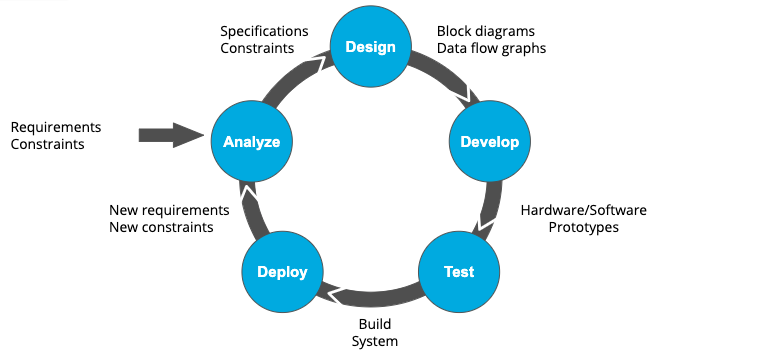

In [2]:
Image(filename='edge-ai-development-cycle.png')

### 1. Analyze
In developing an Edge AI system, the first phase is to analyze the problem.

* During this phase, you (as the IoT engineer) work with the end-user `to understand what they are wanting to do and to get all of the requirements and constraints involved`.
* For example, you might be working with a client who has a `self-checkout system at a supermarket`. They might be using cameras to record the customers, and want to run inference on the video feed to check that the number of items scanned matches the number of items detected in the video feed, in order `to detect possible theft`.

The client will have certain constraints—for example, `maybe they have four cameras, a limited budget, and a PC running in the office that they can potentially use to do the inference.` Understanding all of these needs and constraints is a critical step if you want to present an effective solution to the customer.



#### Simplified requirements and constraints

**Requirements for People Counter App at Edge**
* Preprocess the video or camera inpute (resize image) as AI models use generally small size ,224 by 224 or 300 by 300 are popular

* Run inference to detect
  * no of people on camera
* Track amount of time spent on camera feed
* Send summary to MQTT server

**Constraints**
* Max no of people/frame (set by pretrained model)
* frame rate for detection (depends on underlying hardware)


### 2. Design

In the next stage of the process, you work out the `overall design of the system, including the different components and how the data will flow from one to the next`. In the example, we've been discussing, the cameras would be recording video, which would be sent to the edge device where the inference would be run. The output from the edge device might then be sent to a staff member's device to notify them of possible theft.

At this stage, you as the engineer will probably have a good hypothesis about what hardware solution is most appropriate. For example, in the scenario described above, maybe you have a guess that the CPU in the client's existing PC will be sufficient. But you don't know for sure until you test it.

Let's revisit the example from the previous page and discuss the design of the system in more detail. 

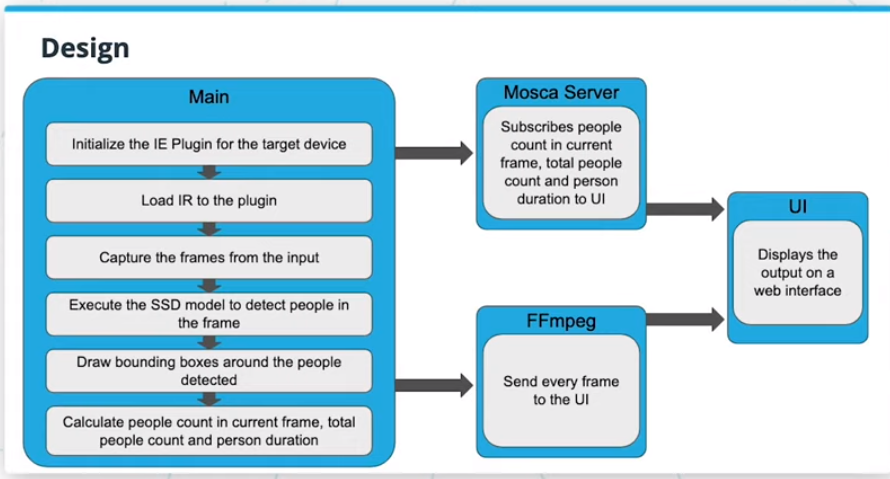

In [3]:
Image(filename='design.png')

**Main Section**
* Main section starts by initializing hardware and loading plugin or plugins for the chosen target device that is CPU or GPU,the VPU,or FPGA
* This then loops through the following sequence :
  * get frame from camera or video,run inference,post-process and draw boxes around people,incrememt counts and durations and publish this to MQTT server
  * The FFmpeg server is used to compress video and stream to the user interface web server.
  * The Mosca server is Node.js based,MQTT server,a broker that handles the published status from main loop and sends out subscribed messages to the user interface web server
  * The Mosca server is used instead of remote or public server ,so that this system can be run without needing an internet connection

### 3. Develop

* you'll develop a prototype application, using the OpenVINO Toolkit. 
* You'll select which AI models you think might work best to conduct the inference. And similarly, you'll decide which hardware types are potential candidates.

**Hardware Prototpye development**
* Laptop or Virtual Machine
* Upgrading a deployed system
* Match specifications with edge devices


**software prototype development**
* Reference implementations
* OpenVino sample and Demo Code
* Python/C++

### 4.Test and Deploy


**Test**
* Actually purchasing the hardware to test your system would be prohibitively expensive and isn't necessary—your laptop or a virtual machine can provide a starting point. 
* In this course, we'll be showing you how to use the Intel DevCloud to try out a variety of different devices, so that you can develop your system without having to first spend money on any actual hardware yourself.

**Deploy**
* Now that you've tested your design and selected your hardware, the last step is to actually deploy the system for the client. But your work is not over at this point. Despite all of the design work and testing you've done, there will probably be room for improvement based on real-world usage.
* For example, maybe you thought a fanless, closed CPU system was good—but once the system is actually deployed, discover that the system overheats during the summer months. Based on this data, you can create a revised set of requirements and constraints—and feed this back into the beginning of the development process, analyzing and redesigning to improve the system.


### Testing and deployment
* Simulated edge device
  * Mimic real time systems
  * Less expansive than actual buying hardware
* Intel Devcloud for the edge
* Debugging
  * Find and remove errors
  * Improve your current system

1.Work with the end-user to understand the requirements and constraints involved- **Analyze**

2.Work out the overall structure of the system and how the components will interact- **Design**

3.Build a prototype application, selecting the potential models and hardware types- **Develop**

4.Run your prototype system on the DevCloud or simulated edge device - **Test**

5.Install the system for the client- **Deploy**

# 4.Basic Terminology

**CPU (Central Processing Unit)**

The actual subset of the device that performs the basic operations of running the operating system or reading and writing from memory or interfaces with other devices. Often used synonymously with microprocessor or core.

**GPU (Graphics Processing Unit)**

Normally used for displaying videos or adjusting photos; can also be used to run inference on OpenVino models.

**AI Accelerators**

Hardware specifically designed to handle AI requirements and speed up processes used in AI and machine learning.

**VPU (Vision Processing Unit)**

A processor specifically optimized for running the types of calculations that occur frequently in convolutional neural networks. Myriad X and Google's TPU are examples of VPUs.

**NCS-2 (Neural Compute Stick 2)**

A specific implementation of a VPU (in this case the Myriad-X) with 4GB of memory and a USB3 form factor. This is the lowest cost and lowest performing type of accelerator.

**FPGA (Field Programmable Gate Array)**

OpenVino supports several boards from different manufacturers with an Arria-10 device to run AI models. These are generally the highest performing type of accelerator, but they also tend to support the smallest number of layers. FPGAs are therefore often run in Hetero mode to specify a fallback device - typically the CPU - to handle any unsupported layers.

**HDDL/VAD (High Density Deep Learning / Vision Accelerator Design)**

Devices with multiple Myriad-X chips (either 4 or 8), which appear to the system as if you plugged in multiple USB NCS-2s

**TDP (Thermal Design Power)**

The maximum amount of heat generated by a processor that the cooling system is designed to dissipate under any workload.

**Hetero**

API option that allows you to specify more than one hardware device to run the inference. Hetero mode is often used with an FPGA and a CPU. Since FPGAs do not support all of the layers of every kernel or model, the Hetero mode specifies a 'fallback' device to use for these unsupported layers.

**Multi**

API option that is run when you want to run multiple copies of the same inference. One inference will run on each of the specified devices.

**SYNC mode**

API option that causes the application to wait for inference to complete.

**ASYNC mode**

API option that allows inference and the application to run simultaneously.

**OPENVINO target devices**
* CPU/Microprocesor/core     (runs OS,reading and writing to memory,interfaces with other deveices)
   * AI models can be run on integrated GPU to offload CPU
   * Models can be run on both CPU and GPU together
   * Another option to offload CPU is to add accelerators
* GPU
* Accelerators
   * VPU(Visual Processing Unit specifically designed for computation in CNN)
      * Google's Myriad x and TPU(Tensor Processing Unit) is example of VPU
      * NCS2(Neural Compute Stick 2 is specific impplementaion of VPU) 
   * FPGA (Field Programable Gate Array)
   * HDDL/VAD,High Density Deep Learning ,Vision Accelerator Design
       * These are devices with multiple Myriad X chips(4 or 8) and multiple USB NCS2

#### Accelerator for AI
**OPENVINO supports 3 types of Accelerator**
* USB connected Myriad-X(NCS2)
* PCIe cards with 4 or 8 Myriad-X chips (HDDL)
* PCIe FPGA cards :(Arria-10 FPGA)

**OPENVINO Operating Modes**
* **HETERO**[device1,device2]
  * Prioritized list of devices to run inference
  * Often used with FPGA and CPU
    * CPU supports every layer
    * CPU and GPU supports second largest list of kernel layers of model shipped with OPENVINO
    * FPGA support least layers
  * layers in the model are supported on your device
  
* **MULTI**(device1,device2,device3)
  * Inference will run on all of these devices
  
* **SYNC vs ASYNC**
  * ASYNC mode allows to run inference and application simultaneously
 * SYNC mode cause application to wait for inference to complelte

# 5. Intel DevCloud


`The Intel DevCloud is a cloud environment that allows you to build, prototype, and check the performance of your application on several different hardware devices.`

There are five main components of the Intel Devcloud for the Edge:

**User**
 That’s you, connecting via a browser to a development server.
 
**Development Server**. 
The development server offers Jupyter notebooks, where you can run your program.

**Job Queue**.
This is where you select the hardware to run your application. In order to request the hardware, you need to submit a job requesting an edge node.

**Edge Node**.
You can submit your job to a hardware platform containing a specific target architecture or a combination of CPU, GPU, VPU, and FPGA architectures.

**Inference Output***
. You can view real-time performance results of your jobs as a text file or a real-time annotated video.

The DevCloud allows you to access a development environment through Jupyter Notebooks—but note that this development environment contains only a single-core Xeon Processor and 4 GB of RAM. It does not contain any of the other hardware sets. It is meant for writing the code for your application and for visualizing the results.

To access different hardware, you will have to request an Edge Node. An Edge node is a separate server that contains both the different hardware types (like VPU, FPGA and GPU) and the software you need to run your applications (like OpenVINO).